# Principal Component Analysis
* we rotate the coordinate system such that the vector which explains the majority of the variance is now the "x axis" (principal component 1)
* new axes don't really mean anything
 * instead, they are combinations of the other axes or dimensions
 * ...but they capture the variance in the data
* we can only visualize up to 3 dimensions
...but what if our data has hundreds or thousands of dimensions?
* first, let's look at <a href=http://setosa.io/ev/principal-component-analysis/ target=_new>an interactive demo in 2-D and 3-D</a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

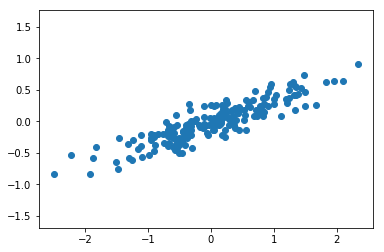

In [2]:
# First, we'll generate some random 2-D data and plot it
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.show()

In [3]:
# Now we'll generate a 2-component PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [4]:
# Here are the component vectors
pca.components_

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

In [5]:
# Here is the amount of variance explained by each component
pca.explained_variance_ratio_

array([0.97634101, 0.02365899])

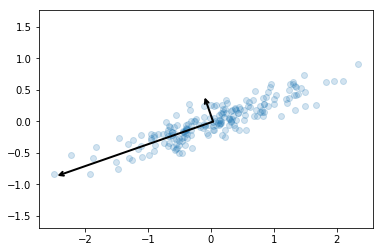

In [6]:
# This function will let us see the principal components
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal')
plt.show()

In [7]:
# Now let's fit the same data using only one component
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)

In [8]:
X.shape

(200, 2)

In [9]:
X_pca.shape

(200, 1)

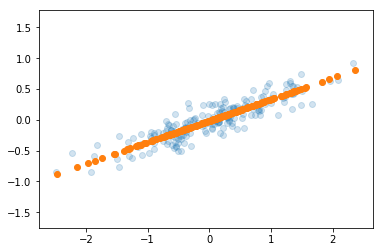

In [10]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1])
plt.axis('equal')
plt.show()

## Iris Dataset

In [11]:
# Code source: Gaël Varoquaux
# License: BSD 3 clause
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
np.random.seed(5)
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [12]:
# Let's approximate the Iris data set using 3 principal components
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)
X.shape

(150, 3)

In [13]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557, 0.01718514])

In [14]:
sum(pca.explained_variance_ratio_)

0.9948169145498101

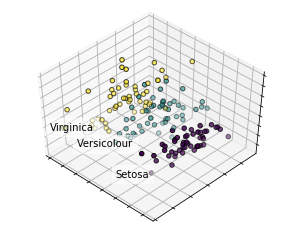

In [15]:
# Plot the 3 components
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis',
           edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()

In [16]:
# how many dimensions do we need to explain at least 95% of variance?
np.cumsum(pca.explained_variance_ratio_)

array([0.92461621, 0.97763178, 0.99481691])

## Digits Dataset

In [17]:
# Load the handwritten digits dataset
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [20]:
# project from 64 down to 2 dimensions
pca = PCA(2)  
projected = pca.fit_transform(digits.data)

In [21]:
digits.data.shape

(1797, 64)

In [22]:
projected.shape

(1797, 2)

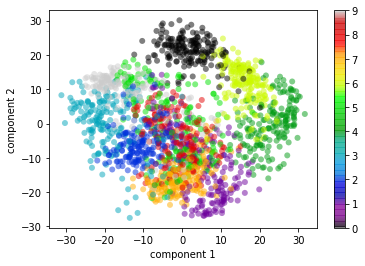

In [23]:
# What do we notice when we plot the 2 components?
plt.scatter(projected[:, 0], projected[:, 1],
     c=digits.target, edgecolor='none', alpha=0.5,
     cmap=plt.cm.get_cmap(plt.cm.nipy_spectral, 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()

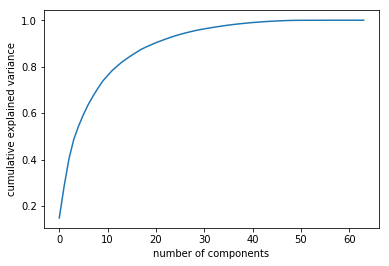

In [24]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

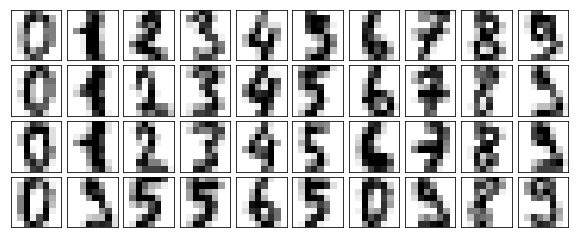

In [25]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
        subplot_kw={'xticks':[], 'yticks':[]},
        gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
            cmap='binary', interpolation='nearest',
            clim=(0, 16))
    plt.show()

plot_digits(digits.data)

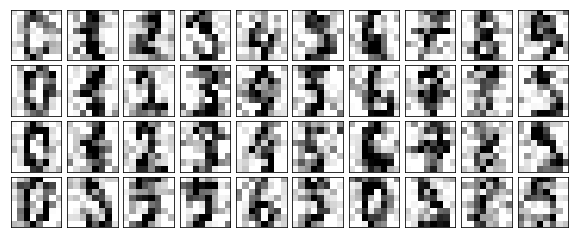

In [26]:
# Let's add some random noise to the digits data
# (by the way, what is random noise?)
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [27]:
# Let's fit a PCA to the noisy digits data, and try to explain 50% of the variance
# How many components do we need?
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

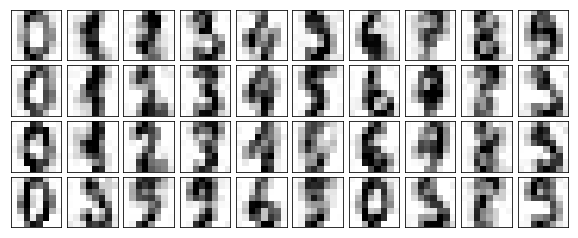

In [28]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

## Faces Dataset

In [29]:
# Dataset of labeled faces "from the wild"
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
faces.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'], dtype='<U17')

In [30]:
faces.images.shape

(1348, 62, 47)

In [31]:
# compute principal components
pca = PCA(svd_solver='randomized')
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False)

In [32]:
pca.components_.shape

(1348, 2914)

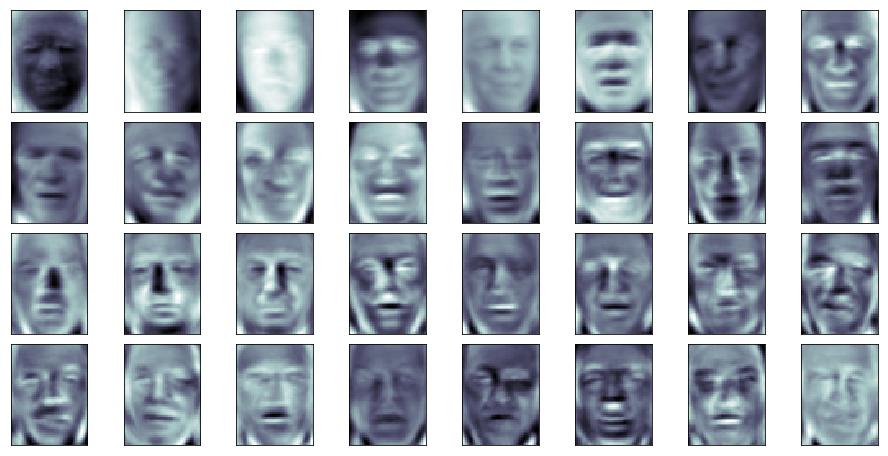

In [33]:
# What are we plotting here?
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 8, figsize=(16, 8),
   subplot_kw={'xticks':[], 'yticks':[]},
   gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

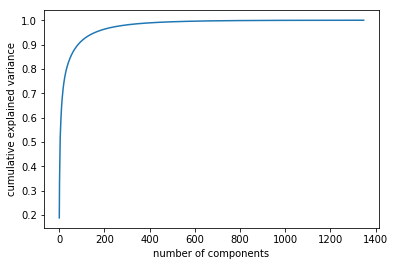

In [34]:
import numpy as np
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

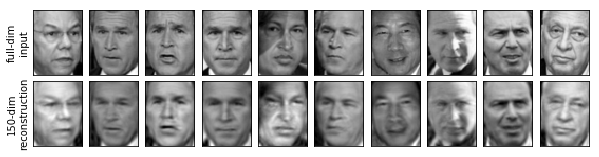

In [35]:
pca = PCA(150, svd_solver='randomized')
pca.fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
    subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction')
plt.show()